In [6]:
!pip install giotto-tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gtda.homology
import gtda.diagrams
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import gtda.images
from collections import Counter

In [11]:
!tar -xf "/content/drive/MyDrive/Flower_Dataset/102flowers.tgz"
!tar -xf "/content/drive/MyDrive/Flower_Dataset/102segmentations.tgz"
mat = scipy.io.loadmat('/content/drive/MyDrive/Flower_Dataset/imagelabels.mat')
labels = np.array(mat["labels"]).T

In [13]:
names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper","blackberry lily"
]


In [14]:
def show_image(i):
  j = 5 - len(str(i))
  l = "0"
  for k in range(1,j):
    l = l + "0"
  l = l + str(i)
  image = plt.imread("/content/jpg/image_"+l+".jpg")
  plt.imshow(image)

def show_image_1(i):
  j = 5 - len(str(i))
  l = "0"
  for k in range(1,j):
    l = l + "0"
  l = l + str(i)
  image = plt.imread("/content/segmim/segmim_"+l+".jpg")
  plt.imshow(image)

In [15]:
def return_image(i):
  j = 5 - len(str(i))
  l = "0"
  for k in range(1,j):
    l = l + "0"
  l = l + str(i)
  image = plt.imread("/content/jpg/image_"+l+".jpg")
  return image

def return_image_1(i):
  j = 5 - len(str(i))
  l = "0"
  for k in range(1,j):
    l = l + "0"
  l = l + str(i)
  image = plt.imread("/content/segmim/segmim_"+l+".jpg")
  return image

In [ ]:
##################################################################
###############Plotting Sample Images ############################
##################################################################

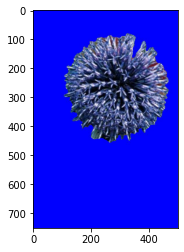

In [ ]:
#Sample Images : 1. Global Thistle
show_image_1(7088)

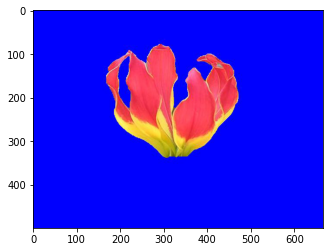

In [54]:
#Sample Images : 2. Fire-Lily
show_image_1(6780)

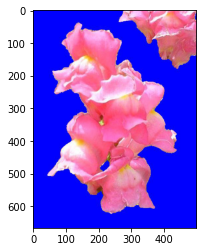

In [ ]:
#Sample Images: 3. Snap Dragon
show_image_1(3145)

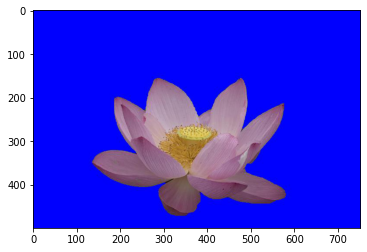

In [ ]:
#Sample Images: 4. Lotus
show_image_1(1900)

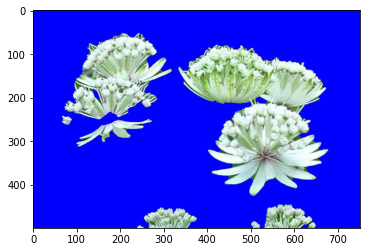

In [ ]:
#Sample Images: 5. oxeye daisy
show_image_1(5793)

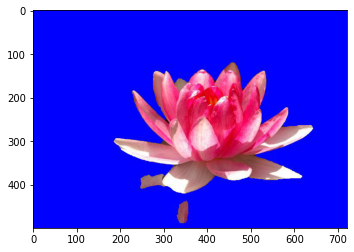

In [57]:
#Sample Images: 6. water lily 
show_image_1(422)

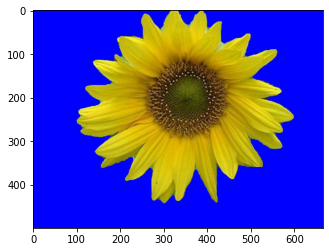

In [ ]:
#Sample Images: 7. Sunflower
show_image_1(5427)

In [16]:
#Obtaining images corresponding to the class_labels
sub = [10, 21, 78, 11, 13, 73, 54]
#ordered = [10, 11, 13, 21, 54, 73, 78]

class_labels = ["globe thistle", "snap dragon", "oxeye daisy", "fire lily", "sunflower", "water lily", "lotus"]

y_1 = np.array(labels).T[0]
k = np.arange(1, 8190, 1)
indices = []
labels = []

for i in sub:
  r = (y_1 == i)
  indices = indices + list(k[r])
  labels = labels + list(y_1[r])

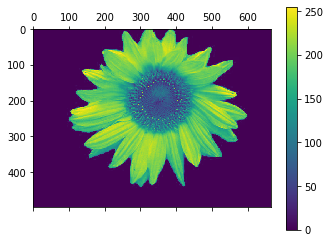

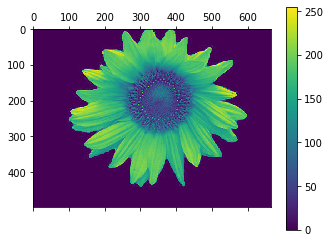

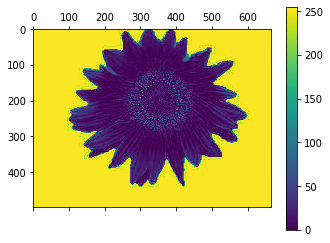

In [ ]:
img = return_image_1(5427)
for j in [0,1,2]:
  plt.matshow(img[:,:,j]);
  plt.colorbar()

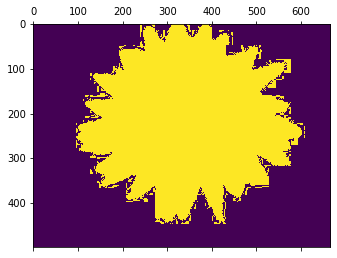

In [ ]:
plt.matshow((img[:,:,0] > 0)*1)

In [ ]:
height_array = [[1,0],[0,1],[1,1],[-1,1],[1,-1],[-1,-1],[-1,0],[0,-1]]

def height_data_fn(images, ht_array = height_array, ent=True, land=False, 
                   heat=False, wdist=False, betti=False):
    if len(np.shape(images)) == 2:
      images = images.reshape(1,np.shape(images)[0], np.shape(images)[1])
    height_data = np.zeros((np.shape(images)[0],1))
    for i in range(0, np.shape(ht_array)[0]):
        height_fil_images = gtda.images.HeightFiltration(direction = np.array(ht_array[i])).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(height_fil_images)
        if ent == True:
            height_data = np.concatenate((height_data,gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)), axis = 1)
        if land == True:
            height_data= np.concatenate((height_data,gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                                             order = None).fit_transform(cubical_diagrams)), axis = 1)
        if heat == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)
        if betti == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)
        if wdist == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)   
    return height_data[:,1:]

In [ ]:
radial_array = [[6,6],[13,6],[20,6],[6,13],[13,13],[20,13],[6,20],[13,20],[20,20]]

def radial_data_fn(images, r_array = radial_array, ent=True, land=False, 
                   heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(r_array)[0]
    if len(np.shape(images)) == 2:
      images = images.reshape(1,np.shape(images)[0], np.shape(images)[1])
    radial_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(r_array)[0]):
        radial_fil_images = gtda.images.RadialFiltration(center = np.array(r_array[i])).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(radial_fil_images)
        if ent == True:
            radial_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            radial_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2                   
    return radial_data


In [ ]:
density_array = [5,8,11]

def density_data_fn(images, d_array = density_array, ent=True, land=False, 
                    heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(d_array)[0]
    if len(np.shape(images)) == 2:
      images = images.reshape(1,np.shape(images)[0], np.shape(images)[1])
    density_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(d_array)[0]):
        density_fil_images = gtda.images.DensityFiltration(radius = d_array[i]).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(density_fil_images)
        if ent == True:
            density_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            density_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2
    return density_data

In [ ]:
def grayscale_data_fn(images, ent=True, land=False, 
                      heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    if len(np.shape(images)) == 2:
      images = images.reshape(1,np.shape(images)[0], np.shape(images)[1])
    grayscale_data = np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(images)
    m=0
    if ent == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        grayscale_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2           
    return grayscale_data

In [ ]:
 def vr_data_fn(images, ent=True, land=False, 
               heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    if len(np.shape(images)) == 2:
      images = images.reshape(1,np.shape(images)[0], np.shape(images)[1])
    vr_data = np.zeros((np.shape(images)[0],n_col))
    point_cloud_data = gtda.images.ImageToPointCloud().fit_transform(images)
    cubical_diagrams = gtda.homology.VietorisRipsPersistence(reduced_homology = False, infinity_values= 28.0).fit_transform(point_cloud_data)
    m=0
    if ent == True:
        vr_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        vr_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2           
    return vr_data

In [ ]:
h_data = []
r_data = []
g_data_1 = []
g_data_2 = []
g_data_3 = []
count = 0
for i in indices[350:]:
  count = count + 1
  images = return_image_1(i)
  binarized_images = (images[:,:,0] > 0)*1
  h_data.append(height_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)[0])
  r_data.append(radial_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)[0])
  g_data_1.append(grayscale_data_fn(images = images[:,:,0], ent = True, wdist = True, land = True, betti = True)[0])
  g_data_2.append(grayscale_data_fn(images = images[:,:,1], ent = True, wdist = True, land = True, betti = True)[0])
  g_data_3.append(grayscale_data_fn(images = images[:,:,2], ent = True, wdist = True, land = True, betti = True)[0])
  if count % 20 == 0:
    print(count)
    t = np.concatenate((h_data, r_data, g_data_1, g_data_2, g_data_3), axis = 1)
    pd.DataFrame(t).to_csv("final_flower.csv")
    !mv "final_flower.csv" "/content/drive/MyDrive/Flower_Dataset"

In [ ]:
########################################################
#####################Accuracy Using Random Forest ######
########################################################

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import normalize

In [7]:
data = np.array(pd.read_csv("/content/drive/MyDrive/Flower_Dataset/final_flower.csv"))[:,1:]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, labels[:610], test_size=0.30, random_state=42)

In [19]:
classifier = RandomForestClassifier(n_estimators = 1000, random_state = 31415)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=31415,
                       verbose=0, warm_start=False)

In [20]:
test_pred = classifier.predict(X_test)
diff = pd.DataFrame(test_pred - y_test , columns = ['values'])
mismatch = diff[diff['values']!= 0]
print('Accuracy of model is', 100 - np.shape(mismatch)[0]*100/np.shape(X_test)[0])

Accuracy of model is 64.48087431693989


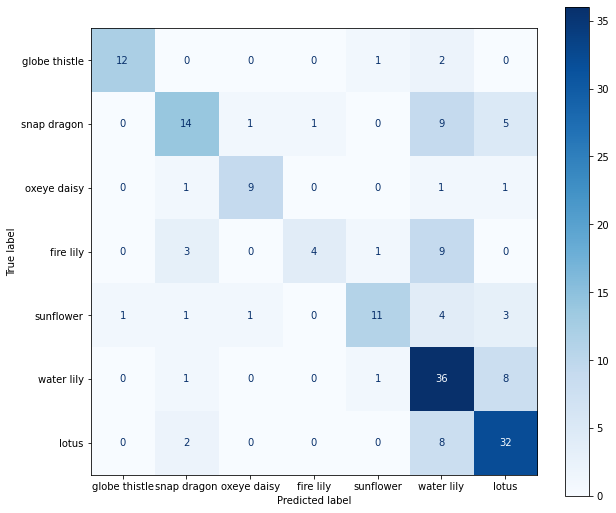

In [50]:
#plot_confusion_matrix(classifier, X_test, y_test)  
#plt.show()  
fig, ax = plt.subplots(figsize=(10, 9))
plot_confusion_matrix(classifier, X_test, y_test, display_labels = class_labels, ax = ax, cmap=plt.cm.Blues)  
plt.show()  

In [ ]:
############################################################
########## Accuracy: feature vectors ord. by importance ####
############################################################

In [28]:
feature_imp = pd.DataFrame(data = {'0': classifier.feature_importances_, '1': range(0,160)}).sort_values(by = ['0'], ascending=False)
featuresort = np.array(feature_imp['1'])
feature_imp_1 = classifier.feature_importances_

In [30]:
y = []
for i in range(20,180,20):
  X_train_1 = X_train[:,featuresort[:i]]
  X_test_1 = X_test[:,featuresort[:i]]
  clf_1 = RandomForestClassifier(n_estimators = 1000, random_state=31415)
  clf_1.fit(X_train_1, y_train)
  Y_pred_1=clf_1.predict(X_test_1)
  y.append(metrics.accuracy_score(y_test, Y_pred_1))
  print("Accuracy:",i," ",metrics.accuracy_score(y_test, Y_pred_1))

Accuracy: 20   0.6612021857923497
Accuracy: 40   0.6666666666666666
Accuracy: 60   0.6775956284153005
Accuracy: 80   0.6721311475409836
Accuracy: 100   0.6775956284153005
Accuracy: 120   0.6721311475409836
Accuracy: 140   0.6721311475409836
Accuracy: 160   0.6612021857923497


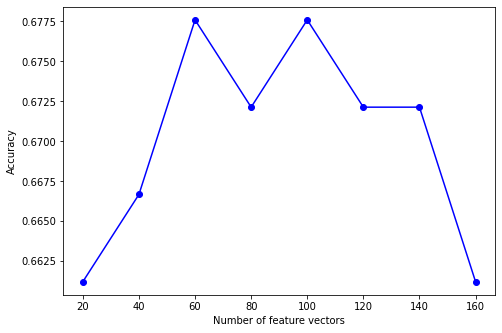

In [31]:
x = np.arange(20, 180 ,20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(x, y, '-ok',color = 'blue')
ax.set_xlabel('Number of feature vectors')
ax.set_ylabel('Accuracy')
plt.show()

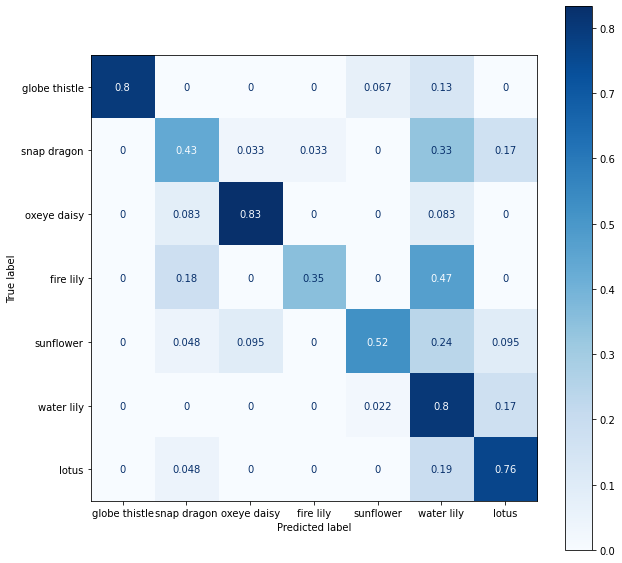

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_1, X_test_1, y_test, display_labels = class_labels, ax = ax, normalize = "true", cmap=plt.cm.Blues)  
plt.show()  

In [ ]:
####################################################
##########Drop highly correlated columns ###########
####################################################

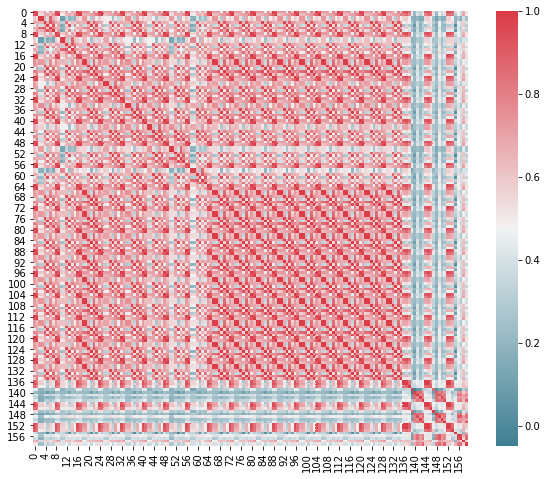

In [34]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = pd.DataFrame(data).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [35]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [42]:
X_train_1 = pd.DataFrame(X_train).drop(pd.DataFrame(X_train)[to_drop], axis = 1)
X_test_1 = pd.DataFrame(X_test).drop(pd.DataFrame(X_test)[to_drop], axis = 1)
clf_1 = RandomForestClassifier(n_estimators = 1000, random_state=31415)
clf_1.fit(X_train_1, y_train)
Y_pred_1=clf_1.predict(X_test_1)
print("Using ",X_train_1.shape[1]," vectors, the accuracy is :",metrics.accuracy_score(y_test, Y_pred_1))

Using  48  vectors, the accuracy is : 0.6775956284153005


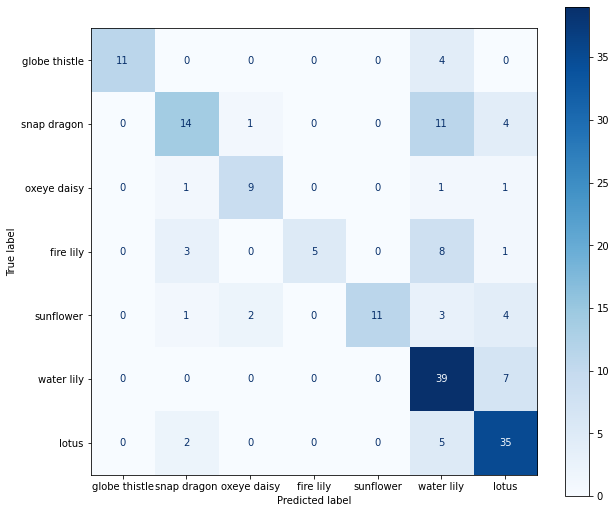

In [48]:
fig, ax = plt.subplots(figsize=(10, 9))
plot_confusion_matrix(clf_1, X_test_1, y_test, display_labels = class_labels, ax = ax, cmap=plt.cm.Blues)  
plt.show() 